In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
data= pd.read_csv("/content/gdrive/MyDrive/Datasets/BRITANNIA.csv")
df= pd.DataFrame(data)

In [ ]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,01-01-2021,BRITANNIA,EQ,3576.35,3575.0,3605.00,3563.05,3573.00,3567.8,3578.02,453083,1.620000e+14,27548.0,189208.0,0.4176
1,04-01-2021,BRITANNIA,EQ,3567.80,3589.0,3593.90,3537.00,3567.00,3552.9,3555.92,698402,2.480000e+14,49346.0,426961.0,0.6113
2,05-01-2021,BRITANNIA,EQ,3552.90,3549.0,3563.95,3540.00,3558.45,3551.1,3549.51,725278,2.570000e+14,32314.0,479432.0,0.6610
3,06-01-2021,BRITANNIA,EQ,3551.10,3568.0,3602.00,3510.00,3541.65,3539.7,3557.45,1099588,3.910000e+14,71303.0,463988.0,0.4220
4,07-01-2021,BRITANNIA,EQ,3539.70,3560.0,3567.95,3516.45,3558.20,3552.8,3546.38,621487,2.200000e+14,45491.0,309280.0,0.4976



From here on, we will focus on tata_steel stock data, so it will be easier to get an understanding. So let us make a new dataframe from the existing one:

In [ ]:
#df =df[df['Symbol']=='TISCO' and 'TATASTEEL']
#df = df[df.query('Symbol == TATASTEEL')]
df = df.loc[df['Symbol'] == 'TATASTEEL']

In [ ]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
1464,17-10-2005,TATASTEEL,EQ,379.00,380.00,386.30,374.60,384.20,384.35,381.89,4618966,1.760000e+14,NaN,967474.0,0.2095
1465,18-10-2005,TATASTEEL,EQ,384.35,386.85,388.55,364.10,365.10,374.85,382.15,3408087,1.300000e+14,NaN,813336.0,0.2386
1466,19-10-2005,TATASTEEL,EQ,374.85,371.60,373.55,352.00,362.70,361.55,365.77,4549667,1.660000e+14,NaN,1378484.0,0.3030
1467,20-10-2005,TATASTEEL,EQ,361.55,365.30,371.85,351.50,359.55,358.60,362.90,4132203,1.500000e+14,NaN,775267.0,0.1876
1468,21-10-2005,TATASTEEL,EQ,358.60,360.35,368.50,357.65,367.50,367.40,363.93,4355886,1.590000e+14,NaN,1853897.0,0.4256


In [ ]:
df.shape

(3851, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3851 entries, 1464 to 5314
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                3851 non-null   object 
 1   Symbol              3851 non-null   object 
 2   Series              3851 non-null   object 
 3   Prev Close          3851 non-null   float64
 4   Open                3851 non-null   float64
 5   High                3851 non-null   float64
 6   Low                 3851 non-null   float64
 7   Last                3851 non-null   float64
 8   Close               3851 non-null   float64
 9   VWAP                3851 non-null   float64
 10  Volume              3851 non-null   int64  
 11  Turnover            3851 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  3846 non-null   float64
 14  %Deliverble         3846 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 48

In [ ]:
df.isna().sum()

Date                     0
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                1395
Deliverable Volume       5
%Deliverble              5
dtype: int64

From above, it can be seen that trades, deliverable volume and deliverable have null values. We will be dropping these columns as they won't be used in the analysis.

In [ ]:
df.describe().round(2)

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,3851.00,3851.00,3851.00,3851.00,3851.00,3851.00,3851.00,3851.00,3.851000e+03,2456.00,3846.00,3846.00
mean,476.42,477.35,485.55,468.22,476.47,476.59,477.14,6975771.17,3.245303e+14,93969.27,1704823.66,0.27
std,153.23,153.69,156.47,150.56,153.48,153.49,153.60,5618375.01,3.253636e+14,58218.86,1278741.77,0.10
min,148.80,137.50,150.40,137.50,148.90,148.80,148.39,66051.00,2.070000e+12,2796.00,24158.00,0.05
25%,369.38,370.08,376.22,363.50,369.08,369.38,370.00,3459313.00,1.510000e+14,57557.25,857215.25,0.19
50%,465.80,466.45,473.85,458.10,465.70,465.85,465.66,5373611.00,2.320000e+14,79400.00,1416502.50,0.26
75%,576.45,577.00,585.10,568.30,576.45,576.52,576.66,8448173.00,3.860000e+14,110710.25,2209717.00,0.33
max,1031.35,1024.00,1052.60,1011.10,1035.00,1034.00,1031.95,64284599.00,4.880000e+15,626502.00,26434718.00,0.97


In [ ]:
df.duplicated().sum()

0

There are no duplicate values in the data

In [ ]:
df["Date"] = pd.to_datetime(df["Date"])
#converting the date column from object to date for easy observations and manipulation

<ipython-input-12-e01e26983152>:1: UserWarning: Parsing '17-10-2005' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["Date"] = pd.to_datetime(df["Date"])
<ipython-input-12-e01e26983152>:1: UserWarning: Parsing '18-10-2005' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["Date"] = pd.to_datetime(df["Date"])
<ipython-input-12-e01e26983152>:1: UserWarning: Parsing '19-10-2005' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["Date"] = pd.to_datetime(df["Date"])
<ipython-input-12-e01e26983152>:1: UserWarning: Parsing '20-10-2005' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["Date"] = pd.to_datetime(df["Date"])
<ipython-input-12-e01e26983152>:1: UserWarning: Parsing '21-10-2005' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent p

In [ ]:
df.info()
#notice the change in the dtype for date column

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3851 entries, 1464 to 5314
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                3851 non-null   datetime64[ns]
 1   Symbol              3851 non-null   object        
 2   Series              3851 non-null   object        
 3   Prev Close          3851 non-null   float64       
 4   Open                3851 non-null   float64       
 5   High                3851 non-null   float64       
 6   Low                 3851 non-null   float64       
 7   Last                3851 non-null   float64       
 8   Close               3851 non-null   float64       
 9   VWAP                3851 non-null   float64       
 10  Volume              3851 non-null   int64         
 11  Turnover            3851 non-null   float64       
 12  Trades              2456 non-null   float64       
 13  Deliverable Volume  3846 non-null   float64  

In [ ]:
df['Month']=df["Date"].dt.month
df['Year']=df["Date"].dt.year
df['Day']=df["Date"].dt.day

In [ ]:
df = df.drop(['Trades','Deliverable Volume','%Deliverble'], axis=1)
#dropping the unnecessary columns

In [ ]:
#we will also drop the Symbol column since we are focusing on the data where Symbol= Tata steel only
df = df.drop(['Symbol'], axis=1)

In [ ]:
df.head()
#observe the new columns added and the ones that were dropped

,Date,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Month,Year,Day
1464,2005-10-17,EQ,379.00,380.00,386.30,374.60,384.20,384.35,381.89,4618966,1.760000e+14,10,2005,17
1465,2005-10-18,EQ,384.35,386.85,388.55,364.10,365.10,374.85,382.15,3408087,1.300000e+14,10,2005,18
1466,2005-10-19,EQ,374.85,371.60,373.55,352.00,362.70,361.55,365.77,4549667,1.660000e+14,10,2005,19
1467,2005-10-20,EQ,361.55,365.30,371.85,351.50,359.55,358.60,362.90,4132203,1.500000e+14,10,2005,20
1468,2005-10-21,EQ,358.60,360.35,368.50,357.65,367.50,367.40,363.93,4355886,1.590000e+14,10,2005,21


In [ ]:
#We will make analysis of dependent variable from independent variables. This is feature enginnering: to extract dependent variables

Text(0.5, 1.0, 'Opening Price of Tata Steel')

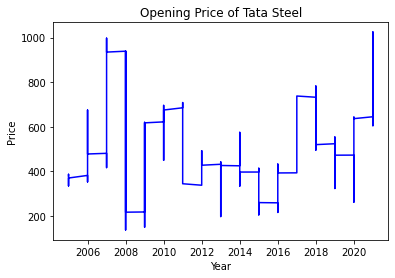

In [ ]:
plt.plot(df['Year'],df['Open'],color='blue')
plt.xlabel("Year")
plt.ylabel("Price")
plt.title("Opening Price of Tata Steel")

Text(0.5, 1.0, 'Volume of Tata Steel over the years')

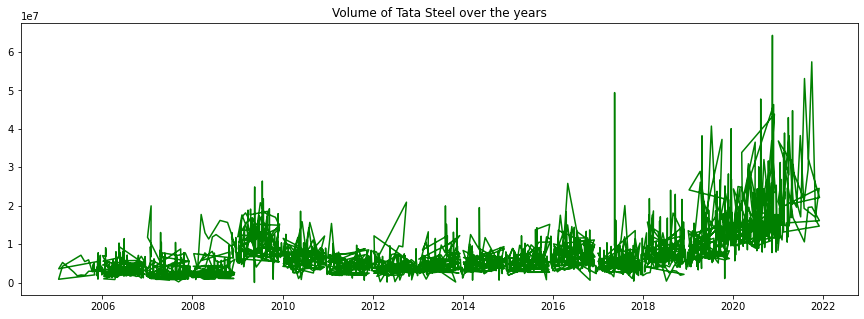

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(df['Date'], df['Volume'], color='green')
plt.title("Volume of Tata Steel over the years")

In [ ]:
import plotly.express as px
figure = px.bar(df, x = df["Date"], y= "Close")
figure.show()

In [ ]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Candlestick(x=df["Date"],
                                        open=df["Open"], high=df["High"],
                                        low=df["Low"], close=df["Close"])])
fig.update_layout(title = "Tata Steel Stock Price Analysis", xaxis_rangeslider_visible=False)
fig.show()

In [ ]:
figure = px.bar(df, x = "Date", y= "Close", title="Closing prices")
figure.show()

In [ ]:
figure = px.bar(df, 
                x = "Date", 
                y= "Close", 
                color="Close")
figure.update_xaxes(rangeslider_visible=True)
figure.show()